In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop 20201022 - 04 Case Information.csv')

In [3]:
data.describe()

,Age
count,361693.000000
mean,38.080931
std,16.583849
min,0.000000
25%,26.000000
50%,35.000000
75%,49.000000
max,107.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363888 entries, 0 to 363887
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CaseCode           363888 non-null  object 
 1   Age                361693 non-null  float64
 2   AgeGroup           361693 non-null  object 
 3   Sex                363888 non-null  object 
 4   DateSpecimen       308027 non-null  object 
 5   DateResultRelease  309246 non-null  object 
 6   DateRepConf        363888 non-null  object 
 7   DateDied           6753 non-null    object 
 8   DateRecover        83813 non-null   object 
 9   RemovalType        319116 non-null  object 
 10  Admitted           363737 non-null  object 
 11  RegionRes          360182 non-null  object 
 12  ProvRes            338949 non-null  object 
 13  CityMunRes         328393 non-null  object 
 14  CityMuniPSGC       328393 non-null  object 
 15  BarangayRes        135168 non-null  object 
 16  Ba

In [5]:
df = data.drop(data.loc[:, 'CaseCode':'Age'].columns, axis=1)
df = df.drop('Sex', axis=1)
df = df.drop(df.loc[:, 'DateResultRelease':'Admitted'].columns, axis=1)
df = df.drop('ProvRes', axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

,AgeGroup,DateSpecimen,RegionRes,CityMunRes,HealthStatus,Quarantined
0,40 to 44,NaN,NCR,CITY OF MANILA,RECOVERED,NO
1,15 to 19,2020-06-29,CARAGA,NaN,RECOVERED,NO
2,20 to 24,2020-05-27,ROF,NaN,RECOVERED,NO
3,35 to 39,2020-07-20,NCR,NaN,RECOVERED,NO
4,25 to 29,2020-07-27,ROF,NaN,RECOVERED,YES
...,...,...,...,...,...,...
363883,25 to 29,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
363884,25 to 29,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
363885,35 to 39,2020-10-08,Region IV-B: MIMAROPA,SAN FERNANDO,MILD,YES
363886,0 to 4,2020-08-24,Region IV-B: MIMAROPA,SANTA MARIA (IMELDA),RECOVERED,YES


In [6]:
titles = list(df.columns)
titles

['AgeGroup',
 'DateSpecimen',
 'RegionRes',
 'CityMunRes',
 'HealthStatus',
 'Quarantined']

In [7]:
titles[4], titles[5] = titles[5], titles[4]
titles[2], titles[3] = titles[3], titles[2]
titles

['AgeGroup',
 'DateSpecimen',
 'CityMunRes',
 'RegionRes',
 'Quarantined',
 'HealthStatus']

In [8]:
df = df[titles]
df

,AgeGroup,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,40 to 44,NaN,CITY OF MANILA,NCR,NO,RECOVERED
1,15 to 19,2020-06-29,NaN,CARAGA,NO,RECOVERED
2,20 to 24,2020-05-27,NaN,ROF,NO,RECOVERED
3,35 to 39,2020-07-20,NaN,NCR,NO,RECOVERED
4,25 to 29,2020-07-27,NaN,ROF,YES,RECOVERED
...,...,...,...,...,...,...
363883,25 to 29,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
363884,25 to 29,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
363885,35 to 39,2020-10-08,SAN FERNANDO,Region IV-B: MIMAROPA,YES,MILD
363886,0 to 4,2020-08-24,SANTA MARIA (IMELDA),Region IV-B: MIMAROPA,YES,RECOVERED


In [9]:
start_date = '2020-09-10'
end_date = '2020-10-10'

df = df.loc[df['RegionRes'] == 'Region IV-A: CALABARZON']
df = df.loc[(df['CityMunRes'] == 'CITY OF ANTIPOLO (CAPITAL)') | (df['CityMunRes'] == 'TAYTAY')]
df = df.loc[(df['DateSpecimen'] >= start_date) & ((df['DateSpecimen'] <= end_date))]
df = df.reset_index(drop=True)

df

,AgeGroup,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,30 to 34,2020-09-28,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,ASYMPTOMATIC
1,25 to 29,2020-09-22,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
2,30 to 34,2020-09-18,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,SEVERE
3,35 to 39,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
4,60 to 64,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED
...,...,...,...,...,...,...
1347,30 to 34,2020-09-16,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
1348,25 to 29,2020-10-08,TAYTAY,Region IV-A: CALABARZON,NO,MILD
1349,5 to 9,2020-10-03,TAYTAY,Region IV-A: CALABARZON,YES,RECOVERED
1350,25 to 29,2020-10-09,TAYTAY,Region IV-A: CALABARZON,NO,MILD


In [10]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,AgeGroup,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,30 to 34,2020-09-28,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,ASYMPTOMATIC
1,25 to 29,2020-09-22,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
2,30 to 34,2020-09-18,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,SEVERE
3,35 to 39,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
4,60 to 64,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED
...,...,...,...,...,...,...
1347,30 to 34,2020-09-16,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
1348,25 to 29,2020-10-08,TAYTAY,Region IV-A: CALABARZON,NO,MILD
1349,5 to 9,2020-10-03,TAYTAY,Region IV-A: CALABARZON,YES,RECOVERED
1350,25 to 29,2020-10-09,TAYTAY,Region IV-A: CALABARZON,NO,MILD


In [11]:
Taytay = df
Antipolo = df

Taytay = Taytay.loc[Taytay['CityMunRes'] == 'TAYTAY']
Antipolo = Antipolo.loc[Antipolo['CityMunRes'] == 'CITY OF ANTIPOLO (CAPITAL)']

Taytay = Taytay.reset_index(drop=True)
Antipolo = Antipolo.reset_index(drop=True)

In [12]:
Taytay

,AgeGroup,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,60 to 64,2020-09-18,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
1,35 to 39,2020-09-18,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
2,25 to 29,2020-09-18,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
3,40 to 44,2020-09-11,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
4,45 to 49,2020-09-14,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
...,...,...,...,...,...,...
492,30 to 34,2020-09-16,TAYTAY,Region IV-A: CALABARZON,NO,RECOVERED
493,25 to 29,2020-10-08,TAYTAY,Region IV-A: CALABARZON,NO,MILD
494,5 to 9,2020-10-03,TAYTAY,Region IV-A: CALABARZON,YES,RECOVERED
495,25 to 29,2020-10-09,TAYTAY,Region IV-A: CALABARZON,NO,MILD


In [13]:
Antipolo

,AgeGroup,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,30 to 34,2020-09-28,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,ASYMPTOMATIC
1,25 to 29,2020-09-22,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
2,30 to 34,2020-09-18,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,SEVERE
3,35 to 39,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,YES,RECOVERED
4,60 to 64,2020-10-01,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED
...,...,...,...,...,...,...
850,70 to 74,2020-09-24,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED
851,45 to 49,2020-10-08,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,MILD
852,45 to 49,2020-09-27,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED
853,40 to 44,2020-09-10,CITY OF ANTIPOLO (CAPITAL),Region IV-A: CALABARZON,NO,RECOVERED


In [14]:
#1st City
unique = Taytay['CityMunRes'].unique().tolist()
uniAgeG = Taytay['AgeGroup'].unique().tolist()
uniHealth = Taytay['HealthStatus'].unique().tolist()
uniDate = Taytay['DateSpecimen'].unique().tolist()

#2nd City
unique2 = Antipolo['CityMunRes'].unique().tolist()
uniAgeG2 = Antipolo['AgeGroup'].unique().tolist()
uniHealth2 = Antipolo['HealthStatus'].unique().tolist()
uniDate2 = Antipolo['DateSpecimen'].unique().tolist()

In [15]:
#1st City
for i in range(len(Taytay)):
    for j in unique:
        if Taytay['CityMunRes'][i] == j:
            Taytay['CityMunRes'][i] = unique.index(j)
    
    for k in uniAgeG:
        if Taytay['AgeGroup'][i] == k:
            Taytay['AgeGroup'][i] = uniAgeG.index(k)

    for l in uniHealth:
        if Taytay['HealthStatus'][i] == l:
            Taytay['HealthStatus'][i] = uniHealth.index(l)
            
    for m in uniDate:
        if Taytay['DateSpecimen'][i] == m:
            Taytay['DateSpecimen'][i] = uniDate.index(m)
   
#2nd City
for i in range(len(Antipolo)):
    for j in unique2:
        if Antipolo['CityMunRes'][i] == j:
            Antipolo['CityMunRes'][i] = unique2.index(j)
    
    for k in uniAgeG2:
        if Antipolo['AgeGroup'][i] == k:
            Antipolo['AgeGroup'][i] = uniAgeG2.index(k)

    for l in uniHealth2:
        if Antipolo['HealthStatus'][i] == l:
            Antipolo['HealthStatus'][i] = uniHealth2.index(l)
            
    for m in uniDate2:
        if Antipolo['DateSpecimen'][i] == m:
            Antipolo['DateSpecimen'][i] = uniDate2.index(m)

In [16]:
#1st City
column = Taytay.loc[:, 'AgeGroup':'CityMunRes'].columns.to_list() # SUBJECT TO CHANGE
x = Taytay[column].astype('int')
y = Taytay['HealthStatus'].astype('int')

#2nd City
column = Antipolo.loc[:, 'AgeGroup':'CityMunRes'].columns.to_list() # SUBJECT TO CHANGE
x2 = Antipolo[column].astype('int')
y2 = Antipolo['HealthStatus'].astype('int')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2)

In [18]:
logreg = LogisticRegression()
logreg2 = LogisticRegression()

In [19]:
logreg.fit(x_train, y_train)
logreg2.fit(x_train2, y_train2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logreg.predict(x_test)
y_pred2 = logreg2.predict(x_test2)

In [21]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[38,  0, 10,  0],
       [ 2,  0,  1,  0],
       [16,  0, 32,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [22]:
matrix2 = metrics.confusion_matrix(y_test2, y_pred2)
matrix2

array([[ 0,  0,  0,  0,  1],
       [ 0, 62,  0,  0, 21],
       [ 0,  2,  0,  0,  0],
       [ 0,  2,  0,  0,  1],
       [ 0, 39,  0,  0, 43]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.00      0.00      0.00         3
           2       0.73      0.67      0.70        48
           3       0.00      0.00      0.00         1

    accuracy                           0.70       100
   macro avg       0.35      0.36      0.36       100
weighted avg       0.67      0.70      0.68       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.59      0.75      0.66        83
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.65      0.52      0.58        82

    accuracy                           0.61       171
   macro avg       0.25      0.25      0.25       171
weighted avg       0.60      0.61      0.60       171



In [25]:
import seaborn as sns

In [26]:
#Taytay
uniHealth

['RECOVERED', 'DIED', 'MILD', 'SEVERE']

In [27]:
#Antipolo
uniHealth2

['ASYMPTOMATIC', 'RECOVERED', 'SEVERE', 'DIED', 'MILD', 'CRITICAL']

IndexError: list index out of range

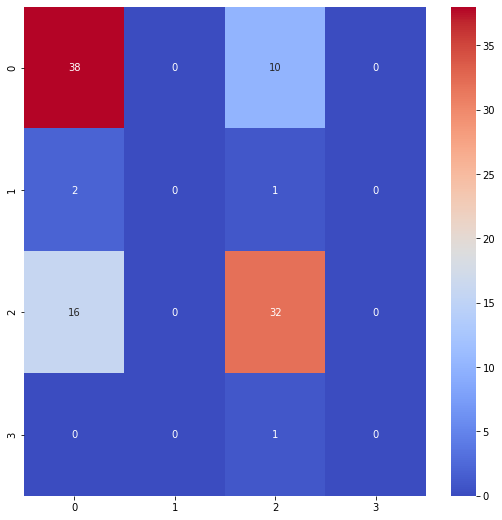

In [28]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
ax.set_yticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
plt.title('Matrix')
plt.show()

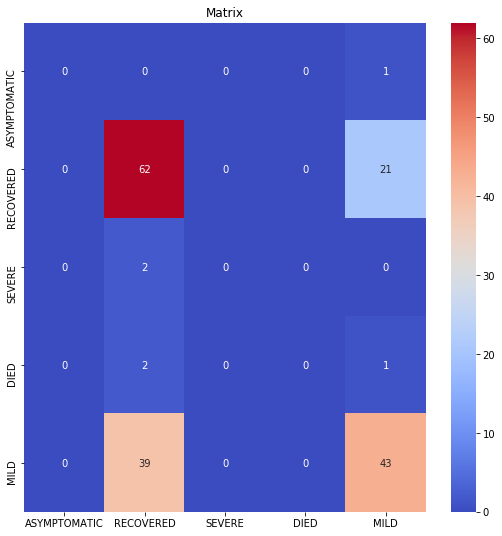

In [29]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(pd.DataFrame(matrix2), annot=True, cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels([uniHealth2[0],uniHealth2[1],uniHealth2[2],uniHealth2[3],uniHealth2[4],uniHealth2[5]])
ax.set_yticklabels([uniHealth2[0],uniHealth2[1],uniHealth2[2],uniHealth2[3],uniHealth2[4],uniHealth2[5]])
plt.title('Matrix')
plt.show()

Problems:
- Chart for logistic regression (weekly/daily basis)